In [65]:
___Author___='LumberJack Jyss'

In [66]:
print('LumberJack BRUTAL AtidotCom TREND RULES\nLumberJack Jyss 5779(c)')

LumberJack BRUTAL AtidotCom TREND RULES
LumberJack Jyss 5779(c)


In [67]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
df =  pd.read_csv('eurusd.csv')
#df =  pd.read_csv('dataset_daily.csv')

In [72]:
df.head()

,Date,oc_eurusd,hl_eurusd,eurusd_close,eurusd_Doc,eurusd_Dhl,rsi_eurusd,ema5_eurusd,ema21_eurusd,EURUSD,short_eurusd,long_eurusd
0,20180507 05:30:00,0.000155,0.000440,-0.000129,0.645161,0.611940,34.044301,1.197409,1.196776,1.197395,0,0
1,20180507 05:45:00,0.000695,0.000700,-0.000580,2.117647,0.481481,6.246257,1.197172,1.196769,1.196700,0,0
2,20180507 06:00:00,0.000125,0.000425,-0.000104,-0.716981,-0.343750,4.828158,1.196973,1.196751,1.196575,0,0
3,20180507 06:15:00,0.000395,0.000560,-0.000330,1.200000,0.257143,1.982946,1.196709,1.196699,1.196180,0,0
4,20180507 06:30:00,0.000025,0.000250,-0.000021,-0.747475,-0.469697,1.845297,1.196524,1.196650,1.196155,0,0


In [73]:
df.set_index(df['Date'],drop=True,inplace=True)
df = df.iloc[:,1:10]
df.head()

,oc_eurusd,hl_eurusd,eurusd_close,eurusd_Doc,eurusd_Dhl,rsi_eurusd,ema5_eurusd,ema21_eurusd,EURUSD
Date,,,,,,,,,
20180507 05:30:00,0.000155,0.000440,-0.000129,0.645161,0.611940,34.044301,1.197409,1.196776,1.197395
20180507 05:45:00,0.000695,0.000700,-0.000580,2.117647,0.481481,6.246257,1.197172,1.196769,1.196700
20180507 06:00:00,0.000125,0.000425,-0.000104,-0.716981,-0.343750,4.828158,1.196973,1.196751,1.196575
20180507 06:15:00,0.000395,0.000560,-0.000330,1.200000,0.257143,1.982946,1.196709,1.196699,1.196180
20180507 06:30:00,0.000025,0.000250,-0.000021,-0.747475,-0.469697,1.845297,1.196524,1.196650,1.196155


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24456 entries, 20180507  05:30:00 to 20190506  00:15:00
Data columns (total 9 columns):
oc_eurusd       24456 non-null float64
hl_eurusd       24456 non-null float64
eurusd_close    24456 non-null float64
eurusd_Doc      24456 non-null float64
eurusd_Dhl      24456 non-null float64
rsi_eurusd      24456 non-null float64
ema5_eurusd     24456 non-null float64
ema21_eurusd    24456 non-null float64
EURUSD          24456 non-null float64
dtypes: float64(9)
memory usage: 1.9+ MB


In [75]:
df.shape

(24456, 9)

In [76]:
df.shape[0]

24456

In [77]:
df.tail()

,oc_eurusd,hl_eurusd,eurusd_close,eurusd_Doc,eurusd_Dhl,rsi_eurusd,ema5_eurusd,ema21_eurusd,EURUSD
Date,,,,,,,,,
20190505 23:15:00,-0.000345,0.001425,-0.002013,-1.960784,2.388889,1.873345,1.119404,1.119337,1.117915
20190505 23:30:00,-0.000125,0.000690,0.000112,-0.897959,-0.481967,11.193971,1.118949,1.119219,1.118040
20190505 23:45:00,0.000050,0.001415,-0.000045,-7.000000,0.917722,10.403430,1.118629,1.119107,1.117990
20190506 00:00:00,-0.000840,0.000890,0.000751,-5.933333,-0.346535,73.436352,1.118696,1.119082,1.118830
20190506 00:15:00,-0.000110,0.000555,0.000098,-0.986486,-0.338384,77.569319,1.118778,1.119069,1.118940


In [78]:
long_list = []
short_list = []
equity_list = []
var_long_list = []
var_short_list = []
candle_close = 0
candle_close_1 = 0
candle_close_2 = 0
candle_close_3 = 0
candle_close_4 = 0
candle_close_5 = 0
candle_open = 0
candle_high = 0
candle_low = 0
c = 0
cc = 0
long_target = 0.0007
short_target = -0.0007
ticket = 100000
equity = 100000
print('Début de la boucle')

import sys
orig_stdout = sys.stdout
f = open('OUt_rules.txt', 'w')
sys.stdout = f


for i in range(5,df.shape[0]-1):
    print('\nCompteur de ligne :',i)
    print('Date :',df.index[i])
    c+=1
    
    candle_close = float(df.iloc[i,8])
    candle_close_1 = float(df.iloc[i-1,8])
    print('candle_close_1',candle_close_1)
    candle_close_2 = float(df.iloc[i-2,8])
    candle_close_3 = float(df.iloc[i-3,8])
    candle_close_4 = float(df.iloc[i-4,8])
    candle_close_5 = float(df.iloc[i-5,8])
    
    
    var1 = candle_close - candle_close_1
    var2 = candle_close - candle_close_2
    var3 = candle_close - candle_close_3
    var4 = candle_close - candle_close_4
    var5 = candle_close - candle_close_5
    
    if var1 > long_target or var2 > long_target or\
    var3 > long_target or var4 > long_target or var5 > long_target:
        var_long_list.append(var1)
        var_long_list.append(var2)
        var_long_list.append(var3)
        var_long_list.append(var4)
        var_long_list.append(var5)
        print('\nDate :',df.index[i])
        print('Long effectué, :',var1,', ',var2,', ',var3,', ',var4)
        print('close actuel',candle_close)
        print("les 4 close d'avant",\
              candle_close_1,candle_close_2,candle_close_3,\
              candle_close_4,candle_close_5)
        print('Max ',max(var_long_list))
        print('pnl :',max(var_long_list))
        equity = equity -3 + max(var_long_list)*ticket
        #equity = equity - 3 + max(var_long_list)*ticket
        print('Nouvel equity :',equity)
        long_list.append(1)
        short_list.append(0)
        equity_list.append(equity)
        cc+=1
        var_long_list = []
    
    elif var1 < short_target or var2 < short_target or \
    var3 < short_target or var4 < short_target or var5 < short_target:
        var_short_list.append(var1)
        var_short_list.append(var2)
        var_short_list.append(var3)
        var_short_list.append(var4)
        var_short_list.append(var5)
        print('\nDate :',df.index[i])
        print('Short effectué :',var1,', ',var2,', ',var3,', ',var4)
        print('close actuel',candle_close)
        print("les 4 close d'avant",\
              candle_close_1,candle_close_2,candle_close_3,\
              candle_close_4,candle_close_5)
        print('Min ',-min(var_short_list))
        print('pnl :', - min(var_short_list))
        equity = equity -3 - min(var_short_list)*ticket
        #equity = equity - 3 - min(var_short_list)*ticket
        print('Nouvel equity :',equity)
        short_list.append(1)
        long_list.append(0)
        equity_list.append(equity)
        cc+=1
        var_short_list = []
    
    else :
        print('\nDate :',df.index[i])
        print('Il ne se passe rien')
        short_list.append(0)
        long_list.append(0)
        equity_list.append(equity)
        cc+=1


print('Boucle terminée')
print('La long target était fixée à ',long_target)
print('La short target était fixée à ',short_target)
print('La règle était 4 périodes consécutives au dessus de long ou au dessous de short')
print('Il y a eu ',df.shape[0],' périodes testées')
print('Durant cette période,',sum(long_list),' long et ',sum(short_list),' short')
print("Les gains totaux s'élèvent à :",round(equity-100000),'$' )
    
f.close()
sys.stdout = orig_stdout


print('Boucle terminée')
print('La long target était fixée à ',long_target)
print('La short target était fixée à ',short_target)
print("La règle était qu'une des 5 periodes d'avant était inférieure ou supérieure à la target (long ou short)")
print('Il y a eu ',df.shape[0],' périodes testées')
print('Durant cette période,',sum(long_list),' long et ',sum(short_list),' short')
print("Les gains totaux s'élèvent à :",round(equity-100000),'$' )

var_dtf = pd.DataFrame()
var_dtf['Long'] = long_list
var_dtf['Short'] = short_list
var_dtf['Equity'] = equity_list

 
    

Début de la boucle
Boucle terminée
La long target était fixée à  0.0007
La short target était fixée à  -0.0007
La règle était qu'une des 5 periodes d'avant était inférieure ou supérieure à la target (long ou short)
Il y a eu  24456  périodes testées
Durant cette période, 6521  long et  6019  short
Les gains totaux s'élèvent à : 1772505 $


In [79]:
candle_close,candle_close_1,candle_close_2,candle_close_3,candle_close_4,candle_close_5,candle_open

(1.11883, 1.11799, 1.11804, 1.117915, 1.12017, 1.120325, 0)

In [80]:
sum(short_list)+sum(long_list), c, cc, len(short_list),len(long_list),len(equity_list),len(df)

(12540, 24450, 24450, 24450, 24450, 24450, 24456)

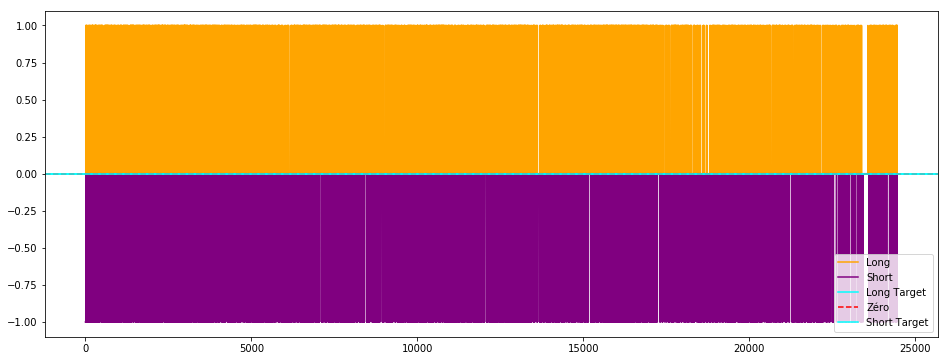

In [81]:
plt.figure(figsize=(16,6))
plt.plot(var_dtf['Long'],color='orange',label='Long')
plt.plot(-var_dtf['Short'],color='purple',label='Short')
plt.axhline(y=long_target, color='cyan',linestyle='-', label='Long Target')
plt.axhline(y=0, color='red',linestyle='--', label='Zéro')
plt.axhline(y=short_target,color='cyan',label='Short Target')
plt.legend()

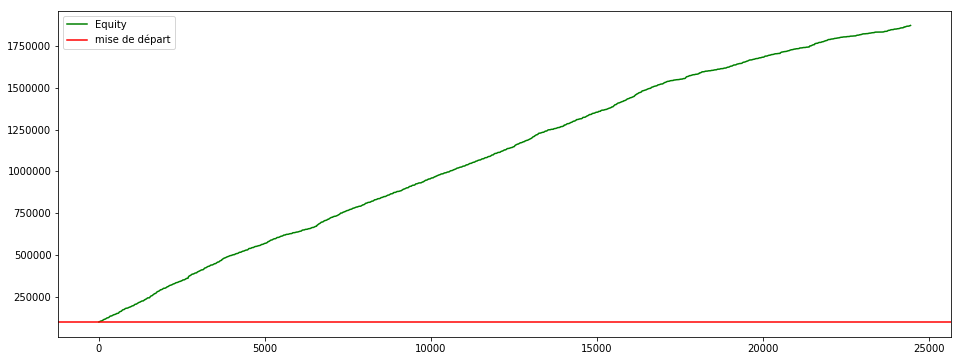

In [82]:
plt.figure(figsize=(16,6))
plt.plot(var_dtf['Equity'],color='green',label='Equity')
plt.axhline(y=100000., color='red',linestyle='-', label='mise de départ')
plt.legend()

In [83]:
len(short_list),len(long_list),len(df)

(24450, 24450, 24456)

In [84]:
df = df.iloc[5:(df.shape[0]-1),:]
df['short_eurusd'] = short_list
df['long_eurusd'] = long_list

In [85]:
print('Nombre de positions de long trouvées :',sum(long_list))
print('Nombre de positions short trouvées :',sum(short_list))
print('Sur un total de ',sum(short_list)+sum(long_list))

Nombre de positions de long trouvées : 6521
Nombre de positions short trouvées : 6019
Sur un total de  12540


In [86]:
print('Sur un achat systématique, les gains représentent',\
      round((sum(short_list)+sum(long_list))/(len(short_list)+len(long_list))*100,2),'%')

Sur un achat systématique, les gains représentent 25.64 %


In [87]:
#df['short'] = df['trend'].shift(-1)
df['short_eurusd'].sum(),df['long_eurusd'].sum()

(6019, 6521)

In [88]:
df.tail()

,oc_eurusd,hl_eurusd,eurusd_close,eurusd_Doc,eurusd_Dhl,rsi_eurusd,ema5_eurusd,ema21_eurusd,EURUSD,short_eurusd,long_eurusd
Date,,,,,,,,,,,
20190503 22:45:00,0.000155,0.000350,-0.000138,1.318182,0.875000,35.142608,1.120148,1.119479,1.120170,0,0
20190505 23:15:00,-0.000345,0.001425,-0.002013,-1.960784,2.388889,1.873345,1.119404,1.119337,1.117915,1,0
20190505 23:30:00,-0.000125,0.000690,0.000112,-0.897959,-0.481967,11.193971,1.118949,1.119219,1.118040,1,0
20190505 23:45:00,0.000050,0.001415,-0.000045,-7.000000,0.917722,10.403430,1.118629,1.119107,1.117990,1,0
20190506 00:00:00,-0.000840,0.000890,0.000751,-5.933333,-0.346535,73.436352,1.118696,1.119082,1.118830,0,1


In [89]:
df = df.dropna()
df.tail()

,oc_eurusd,hl_eurusd,eurusd_close,eurusd_Doc,eurusd_Dhl,rsi_eurusd,ema5_eurusd,ema21_eurusd,EURUSD,short_eurusd,long_eurusd
Date,,,,,,,,,,,
20190503 22:45:00,0.000155,0.000350,-0.000138,1.318182,0.875000,35.142608,1.120148,1.119479,1.120170,0,0
20190505 23:15:00,-0.000345,0.001425,-0.002013,-1.960784,2.388889,1.873345,1.119404,1.119337,1.117915,1,0
20190505 23:30:00,-0.000125,0.000690,0.000112,-0.897959,-0.481967,11.193971,1.118949,1.119219,1.118040,1,0
20190505 23:45:00,0.000050,0.001415,-0.000045,-7.000000,0.917722,10.403430,1.118629,1.119107,1.117990,1,0
20190506 00:00:00,-0.000840,0.000890,0.000751,-5.933333,-0.346535,73.436352,1.118696,1.119082,1.118830,0,1


In [90]:
df['short_eurusd'].sum(),df['long_eurusd'].sum()

(6019, 6521)

In [91]:
df.to_csv('dataset_Ruled.csv')